In [1]:
from __future__ import division
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
init_printing()
u = Function('u')
t, eps= symbols('t epsilon')
omega = symbols('omega', positive=True)

Consider the following system

$$\ddot{u} + 4 u + \varepsilon u^2 \ddot{u} = 0 \enspace .$$

This system can be rewritten as
$$(1 + \varepsilon u^2)\ddot u + 4u = 0 \enspace ,$$
or
$$\ddot u + \frac{4u}{1 + \varepsilon u^2} = 0 \enspace .$$
As a first order system it reads
$$\begin{pmatrix}
\dot u \\ 
\dot v
\end{pmatrix} = \begin{pmatrix}
v \\ 
-\frac{4u}{1 + \varepsilon u^2}
\end{pmatrix} \enspace ,$$
with Jacobian matrix
$$J(u,v) = \begin{bmatrix}
0 & 1 \\ 
-\frac{4(1 - \varepsilon u^2)}{(1+ \varepsilon u^2)^2} & 0
\end{bmatrix} \enspace .$$
This system has a fixed point in $(0,0)$, with eigenvalues
$$\lambda_1 = -2i,\quad \lambda_2 = 2i \enspace ,$$
and we can conclude that this fixed point is a center.

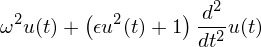

In [3]:
eq = (1 + eps*u(t)**2)*diff(u(t), t, 2) + omega**2*u(t)
eq

## Straightforward expansion

Let's take $u = u_0 +\varepsilon u_1 + \cdots$. Replacing this in the equation we obtain

In [4]:
u0 = Function('u0')
u1 = Function('u1')
subs = [(u(t), u0(t) + eps*u1(t))]

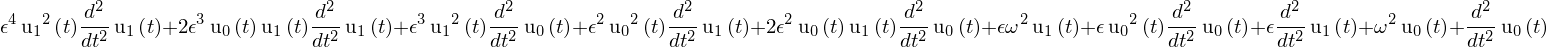

In [5]:
aux = eq.subs(subs)
aux.doit().expand()

In [6]:
poly = Poly(aux.doit(), eps)

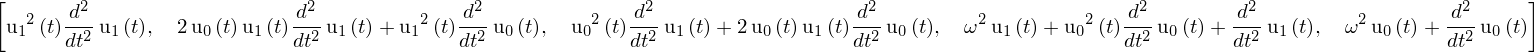

In [7]:
coefs = poly.coeffs()
coefs

In [8]:
sol0 = dsolve(coefs[-1], u0(t)).rhs
sol0

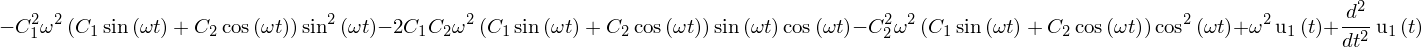

In [9]:
eq_aux = expand(coefs[-2].subs(u0(t), sol0))
eq_aux.doit()

In [37]:
C1, C2, C3, C4 = symbols('C1:5')

In [39]:
sol2 = Eq(u1(t), cos(omega*t)*C4+sin(omega*t)*C3-((cos(3*omega*t)-12*omega*t*sin(omega*t)-9*cos(omega*t))*C2**3+(3*sin(3*omega*t)+3*sin(omega*t)+12*omega*t*cos(omega*t))*C1*C2**2+(-3*cos(3*omega*t)-12*omega*t*sin(omega*t)+3*cos(omega*t))*C1**2*C2+(-sin(3*omega*t)-9*sin(omega*t)+12*omega*t*cos(omega*t))*C1**3)/32)

In [41]:
checkodesol(eq_aux, sol2)

(False,
 omega**2*(-4*C1**3*sin(omega*t)**3 + 3*C1**3*sin(omega*t) - C1**3*sin(3*omega*t) + 12*C1**2*C2*cos(omega*t)**3 - 9*C1**2*C2*cos(omega*t) - 3*C1**2*C2*cos(3*omega*t) + 12*C1*C2**2*sin(omega*t)**3 - 9*C1*C2**2*sin(omega*t) + 3*C1*C2**2*sin(3*omega*t) - 4*C2**3*cos(omega*t)**3 + 3*C2**3*cos(omega*t) + C2**3*cos(3*omega*t)))

In [ ]:
eq.subs(u1(t), )

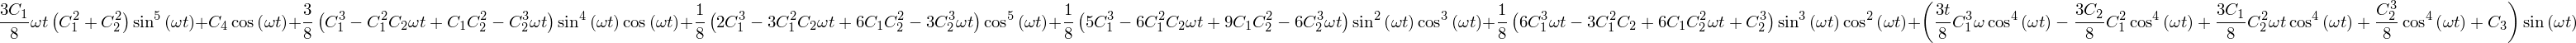

In [29]:
sol1 = dsolve(eq_aux, u1(t)).rhs
sol1

In [31]:
checkodesol(eq_aux, dsolve(eq_aux, u1(t)))

(False,
 omega**2*(6*C1**3*sin(omega*t)**4*cos(omega*t) - 8*C1**3*sin(omega*t)**3 - 6*C1**3*cos(omega*t)**5 + 20*C1**3*cos(omega*t)**3 - 6*C1**3*cos(omega*t) - 3*C1**2*C2*omega*t*sin(omega*t)**4*cos(omega*t) + 3*C1**2*C2*omega*t*cos(omega*t)**5 - 6*C1**2*C2*omega*t*cos(omega*t)**3 + 3*C1**2*C2*omega*t*cos(omega*t) - 24*C1**2*C2*sin(omega*t)**3 + 24*C1**2*C2*cos(omega*t)**3 - 24*sqrt(2)*C1**2*C2*cos(omega*t + pi/4) + 6*C1*C2**2*sin(omega*t)**4*cos(omega*t) + 24*C1*C2**2*sin(omega*t)**3 - 24*C1*C2**2*sin(omega*t) - 6*C1*C2**2*cos(omega*t)**5 - 12*C1*C2**2*cos(omega*t)**3 + 18*C1*C2**2*cos(omega*t) - 3*C2**3*omega*t*sin(omega*t)**4*cos(omega*t) + 3*C2**3*omega*t*cos(omega*t)**5 - 6*C2**3*omega*t*cos(omega*t)**3 + 3*C2**3*omega*t*cos(omega*t) + 8*C2**3*sin(omega*t)**3 - 8*C2**3*cos(omega*t)**3))

In [11]:
u_app = sol0 + eps*sol1

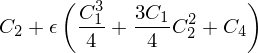

In [12]:
u_app.subs(t, 0)

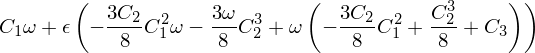

In [25]:
diff(u_app, t).subs(t, 0)

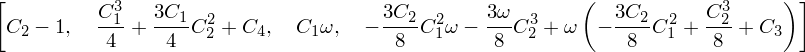

In [14]:
aux_eqs = [
        sol0.subs(t, 0)-1,
        sol1.subs(t, 0),
        diff(sol0, t).subs(t, 0),
        diff(sol1, t).subs(t, 0)]
aux_eqs

In [27]:
print aux_eqs

[C2 - 1, C1**3/4 + 3*C1*C2**2/4 + C4, C1*omega, -3*C1**2*C2*omega/8 - 3*C2**3*omega/8 + omega*(-3*C1**2*C2/8 + C2**3/8 + C3)]


In [15]:
coef = u_app.free_symbols - eq.free_symbols

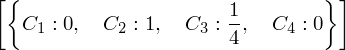

In [26]:
subs_sol = solve(aux_eqs, coef)
subs_sol

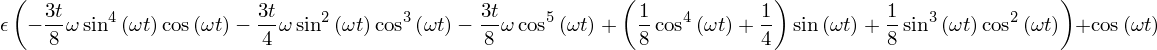

In [17]:
u_app2 = u_app.subs(subs_sol[0])
u_app2

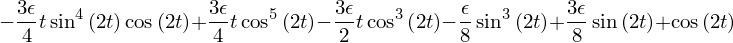

In [18]:
final_sol = trigsimp(u_app2).subs(omega, 2).expand()
final_sol

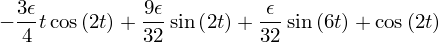

In [19]:
trigsimp(final_sol)

In [20]:
from scipy.integrate import odeint
def fun(x, t=0, eps=0.1):
    x0, x1 = x
    return [x1, -4*x0/(1 + eps*x0**2)]

t_vec = np.linspace(0, 100,  1000)
x = odeint(fun, [1, 0], t_vec, args=(0.1,))

In [21]:
lam_sol = lambdify((t, eps), final_sol, "numpy")
uu = lam_sol(t_vec, 0.1)

<IPython.core.display.Javascript object>


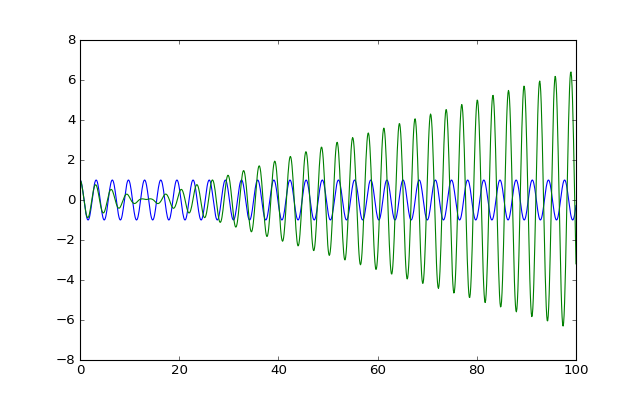

In [22]:
plt.figure(figsize=(8,5))
plt.plot(t_vec, x[:,0])
plt.plot(t_vec, uu)
plt.show()